# Google Calendar Data Analysis

-----

Data Analysis and visualization of your google calendar events.

NOTE: In order to use you first need to download your google calendar data with [google_calendar_downloader.ipynb](https://github.com/markwk/qs_ledger/tree/master/google_calendar/google_calendar_downloader.ipynb)

------

In [31]:
import pandas as pd, numpy as np, string, re, pytz
import matplotlib.pyplot as plt, matplotlib.font_manager as fm
from datetime import datetime as dt
%matplotlib inline

------

## Import Data from target calendar

In [32]:
calendar = pd.read_csv("data/clckbnn2qm0uiu67b18enbcr40@group.calendar.google.com.csv")
calendar_title = "My Special Calendar"
set_year = 2018

In [33]:
# TODO: Import all and provide summary of calendar contents
# for ... in data...:
# do...

## Data Processing

In [35]:
# start and end time cleanup and processing
calendar['start_time'] = calendar['start'].str.extract('(....-..-..T..:..:..)', expand=True)
calendar['end_time'] = calendar['end'].str.extract('(....-..-..T..:..:..)', expand=True)

calendar['start_time'] = pd.to_datetime(calendar['start_time'])
calendar['end_time'] = pd.to_datetime(calendar['end_time'])

# extract date dimensions
calendar['year'] = calendar['start_time'].dt.year
get_month = lambda x: '{}-{:02}'.format(x.year, x.month)
# calendar['month'] = calendar['start_time'].dt.month
calendar['month'] = calendar['start_time'].map(get_month)
calendar['date'] = calendar['start_time'].dt.date
calendar['dow'] = calendar['start_time'].dt.weekday
calendar['hour'] = calendar['start_time'].dt.hour

# durations
calendar['seconds'] =  calendar['end_time'] - calendar['start_time']
calendar['seconds'] = calendar['seconds']/np.timedelta64(1,'s')
calendar['minutes'] = round(calendar['seconds'] / 60, 2)
calendar['hours'] = round(calendar['seconds'] / 60 / 60, 1)

# calendar = calendar.set_index(['start'])

In [36]:
# TODO: process to count number of attendees 
# calendar.attendees.tail()

## Data Analysis

In [37]:
# Limit to a single year
calendar = calendar[calendar.year == set_year]

### Monthly

In [38]:
monthly_count = calendar['month'].value_counts().sort_index()
monthly_duration = calendar.groupby('month')['minutes'].sum()

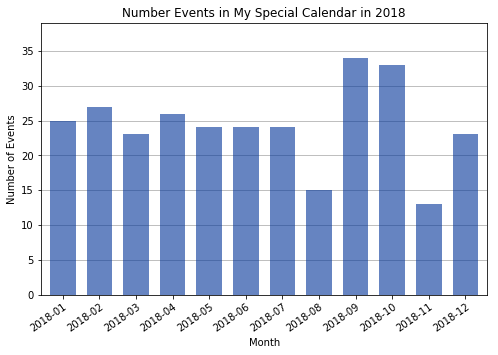

In [39]:
ax = monthly_count.plot(kind='bar', figsize=[8, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(monthly_count.index, rotation=35, rotation_mode='anchor', ha='right')

max = monthly_count.max() + 5

ax.set_ylim((0, max))
ax.set_title('Number Events in ' + calendar_title + " in " + str(set_year))
ax.set_xlabel('Month')
ax.set_ylabel('Number of Events')

plt.show()

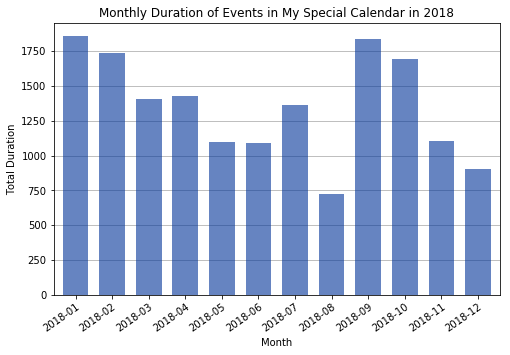

In [40]:
ax = monthly_duration.plot(kind='bar', figsize=[8, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(monthly_duration.index, rotation=35, rotation_mode='anchor', ha='right')

max = monthly_duration.max() + (monthly_duration.max() * .05)

ax.set_ylim((0, max))
ax.set_title('Monthly Duration of Events in ' + calendar_title + " in " + str(set_year))
ax.set_xlabel('Month')
ax.set_ylabel('Total Duration')

plt.show()

### Duration of Meetings

In [41]:
duration_counts = calendar['minutes'].value_counts().sort_index()

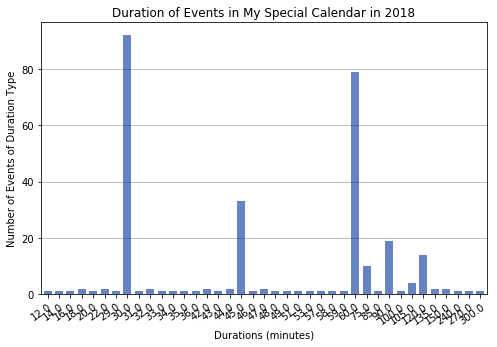

In [42]:
ax = duration_counts.plot(kind='bar', figsize=[8, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(duration_counts.index, rotation=35, rotation_mode='anchor', ha='right')

max = duration_counts.max() + (duration_counts.max() * .05)

ax.set_ylim((0, max))
ax.set_title('Duration of Events in ' + calendar_title + " in " + str(set_year))
ax.set_xlabel('Durations (minutes)')
ax.set_ylabel('Number of Events of Duration Type')

plt.show()

### Day of Week

In [43]:
dow_counts = calendar['dow'].value_counts().sort_index()
dow_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

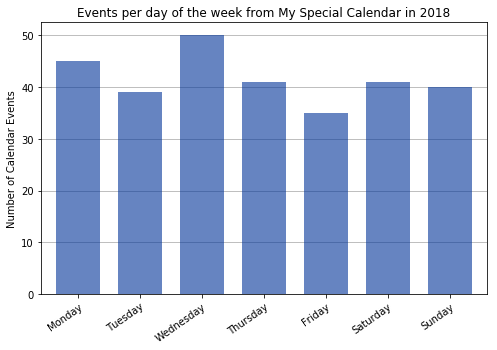

In [44]:
ax = dow_counts.plot(kind='bar', figsize=[8, 5], width=0.7, alpha=0.6, color='#003399', edgecolor=None, zorder=2)

ax.yaxis.grid(True)
ax.set_xticklabels(dow_counts.index, rotation=35, rotation_mode='anchor', ha='right')

max = dow_counts.max() + (dow_counts.max() * .05)

ax.set_ylim((0, max))
ax.set_title('Events per day of the week from ' + calendar_title + " in " + str(set_year))
ax.set_xlabel('')
ax.set_ylabel('Number of Calendar Events')

plt.show()

### Hour of Day

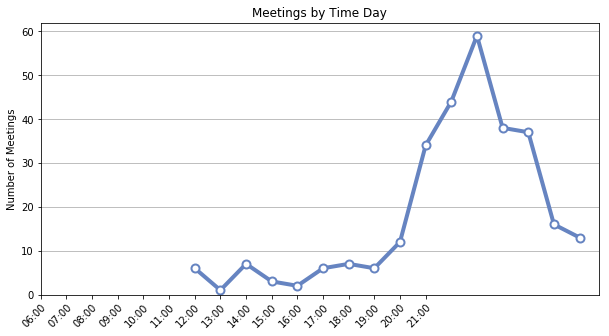

In [45]:
hour_counts = calendar['hour'].value_counts().sort_index()
# TODO: Set zero to  hours with no meetings
ax = hour_counts.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

max = hour_counts.max() + (hour_counts.max() * .05)

ax.yaxis.grid(True)
ax.set_ylim((0, max))
ax.set_ylabel('Number of Meetings')
ax.set_xlabel('')
ax.set_title('Meetings by Time Day')

plt.show()